In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
diri = "withinword_results/"
sns.set_style("whitegrid")


In [2]:
def method_to_legend_name(method):
    txt = method[1]
    if txt == "bert":
        txt = "BERT"
    elif txt == "characterbert":
        return "characterBERT"
    elif txt == "lemma-bert": 
        txt = "BERT-LEMMA\n"
    elif txt == "lemma-characterbert":
        txt = "characterBERT-\nLEMMA"
    elif "flota" in txt:
        txt = "FLOTA k=" + method[1].split("-")[-1] 
    elif "electra" in txt:
        txt = "ELECTRA"
        if "lemma" in method[1]:
            txt += "-LEMMA"        
    elif "xlnet" in txt:
        txt = "XLNET"
        if "lemma" in method[1]:
            txt += "-LEMMA"
        
    txt += " "

    strategydict = {'average':'AVG','waverage':'WAVG','longest':'LNG'}
                    
    if 'character' not in txt:
        txt += "(" + strategydict[method[2]] + ')'
    
    if method[-1]:
        txt += " " + method[-1] + " frequency"
    
    return txt


def load_results():
    model_names = ["bert", "characterbert", "lemma-bert", "lemma-characterbert", "bertflota-3", "google#electra-base-discriminator", "lemma-google#electra-base-discriminator", "xlnet-base-cased", "lemma-xlnet-base-cased"]
   
    all_results = dict()

    for mn in model_names:
        try:
            res = pd.read_csv(diri + "wic_" + mn + "_results.tsv", sep="\t")                    
            modelstrategy = [method_to_legend_name(('wic', r['model'], r['strategy'], '')) for i, r in res.iterrows()]
            
            res["model+strategy"] = modelstrategy
            
            all_results[mn] =  res
        except FileNotFoundError:
            print("file not found:", diri + "wic_" + mn + "_results.tsv")
            continue
    return all_results



def find_best_layers(all_results):    
    metric = "accuracy"
    best_layers = dict()

    for mn in all_results:                
        for strategy in all_results[mn]['strategy'].unique():            
            best_layers[(mn, strategy)] = dict()
            for st in all_results[mn]['split-type'].unique():                          
                here_results = all_results[mn][(all_results[mn]['split-type'] == st) & (all_results[mn]['strategy'] == strategy)]
                here_layers = [(d['layer'], d[metric]) for i, d in here_results.iterrows()]
                
                best_layer = max(here_layers, key=lambda item: item[1])[0]                              
                best_layers[(mn, strategy)][st] = best_layer  
    return best_layers



## Table 15: Accuracy on Wic (ALL and BAL)
0-split-dev is the 0-split subset used for evaluation 

In [3]:
all_results = load_results()

In [4]:
best_layers = find_best_layers(all_results)

In [5]:
sts = ['0-split-dev','1-split-all','1-split-bal','2-split-all', '2-split-bal']

for mn, strategy in best_layers:
    res = []
    if "lemma" not in mn:
        for st in sts:    
            here_results = [r for i, r in all_results[mn].iterrows() if r['strategy'] == strategy and r['split-type'] == st and r['layer'] == best_layers[(mn, strategy)][st]][0]
            res_line = {'strategy':here_results['strategy'], 'model':here_results['model'], 'split-type':here_results['split-type'], 'accuracy': np.round(here_results['accuracy'], 2), 'layer':here_results['layer']}
            res.append(res_line)
    display(pd.DataFrame(res))



,strategy,model,split-type,accuracy,layer
0,average,bert,0-split-dev,0.70,9
1,average,bert,1-split-all,0.66,12
2,average,bert,1-split-bal,0.67,12
3,average,bert,2-split-all,0.75,8
4,average,bert,2-split-bal,0.57,11


,strategy,model,split-type,accuracy,layer
0,longest,bert,0-split-dev,0.70,9
1,longest,bert,1-split-all,0.65,10
2,longest,bert,1-split-bal,0.62,9
3,longest,bert,2-split-all,0.74,10
4,longest,bert,2-split-bal,0.60,12


,strategy,model,split-type,accuracy,layer
0,waverage,bert,0-split-dev,0.70,9
1,waverage,bert,1-split-all,0.65,11
2,waverage,bert,1-split-bal,0.63,9
3,waverage,bert,2-split-all,0.75,8
4,waverage,bert,2-split-bal,0.58,1


,strategy,model,split-type,accuracy,layer
0,average,characterbert,0-split-dev,0.67,11
1,average,characterbert,1-split-all,0.57,11
2,average,characterbert,1-split-bal,0.67,11
3,average,characterbert,2-split-all,0.66,3
4,average,characterbert,2-split-bal,0.66,11


""


""


""


""


,strategy,model,split-type,accuracy,layer
0,average,bertflota-3,0-split-dev,0.69,9
1,average,bertflota-3,1-split-all,0.60,12
2,average,bertflota-3,1-split-bal,0.62,9
3,average,bertflota-3,2-split-all,0.74,7
4,average,bertflota-3,2-split-bal,0.60,2


,strategy,model,split-type,accuracy,layer
0,longest,bertflota-3,0-split-dev,0.69,9
1,longest,bertflota-3,1-split-all,0.60,9
2,longest,bertflota-3,1-split-bal,0.57,6
3,longest,bertflota-3,2-split-all,0.73,8
4,longest,bertflota-3,2-split-bal,0.60,7


,strategy,model,split-type,accuracy,layer
0,waverage,bertflota-3,0-split-dev,0.69,9
1,waverage,bertflota-3,1-split-all,0.60,11
2,waverage,bertflota-3,1-split-bal,0.58,11
3,waverage,bertflota-3,2-split-all,0.75,8
4,waverage,bertflota-3,2-split-bal,0.59,1


,strategy,model,split-type,accuracy,layer
0,average,google#electra-base-discriminator,0-split-dev,0.71,4
1,average,google#electra-base-discriminator,1-split-all,0.62,10
2,average,google#electra-base-discriminator,1-split-bal,0.62,10
3,average,google#electra-base-discriminator,2-split-all,0.76,7
4,average,google#electra-base-discriminator,2-split-bal,0.58,1


,strategy,model,split-type,accuracy,layer
0,longest,google#electra-base-discriminator,0-split-dev,0.71,4
1,longest,google#electra-base-discriminator,1-split-all,0.57,10
2,longest,google#electra-base-discriminator,1-split-bal,0.59,12
3,longest,google#electra-base-discriminator,2-split-all,0.75,7
4,longest,google#electra-base-discriminator,2-split-bal,0.65,12


,strategy,model,split-type,accuracy,layer
0,waverage,google#electra-base-discriminator,0-split-dev,0.71,4
1,waverage,google#electra-base-discriminator,1-split-all,0.62,10
2,waverage,google#electra-base-discriminator,1-split-bal,0.59,10
3,waverage,google#electra-base-discriminator,2-split-all,0.76,7
4,waverage,google#electra-base-discriminator,2-split-bal,0.61,1


""


""


""


,strategy,model,split-type,accuracy,layer
0,average,xlnet-base-cased,0-split-dev,0.62,5
1,average,xlnet-base-cased,1-split-all,0.61,8
2,average,xlnet-base-cased,1-split-bal,0.61,8
3,average,xlnet-base-cased,2-split-all,0.68,3
4,average,xlnet-base-cased,2-split-bal,0.58,3


,strategy,model,split-type,accuracy,layer
0,longest,xlnet-base-cased,0-split-dev,0.62,5
1,longest,xlnet-base-cased,1-split-all,0.62,6
2,longest,xlnet-base-cased,1-split-bal,0.62,6
3,longest,xlnet-base-cased,2-split-all,0.68,4
4,longest,xlnet-base-cased,2-split-bal,0.57,4


,strategy,model,split-type,accuracy,layer
0,waverage,xlnet-base-cased,0-split-dev,0.62,5
1,waverage,xlnet-base-cased,1-split-all,0.62,7
2,waverage,xlnet-base-cased,1-split-bal,0.62,7
3,waverage,xlnet-base-cased,2-split-all,0.69,4
4,waverage,xlnet-base-cased,2-split-bal,0.58,4


""


""


""


## Table 15: Accuracy on SAME vs DIFF 
### (comparison with usage of the lemma)


In [6]:
sts = ['0-split-dev-SAME', '0-split-dev-DIFF', '1-split-SAME', '1-split-DIFF','2-split-SAME', '2-split-DIFF']    

bert average 0-split-dev-SAME 0.7
bert average 0-split-dev-DIFF 0.69
bert average 1-split-DIFF 0.66
bert average 2-split-SAME 0.79
bert average 2-split-DIFF 0.65
lemma-bert average 0-split-dev-SAME 0.73
lemma-bert average 0-split-dev-DIFF 0.65
lemma-bert average 1-split-SAME nan
lemma-bert average 1-split-DIFF 0.7
lemma-bert average 2-split-SAME 0.8
lemma-bert average 2-split-DIFF 0.62
characterbert average 0-split-dev-SAME 0.67
characterbert average 0-split-dev-DIFF 0.68
characterbert average 1-split-SAME nan
characterbert average 1-split-DIFF 0.57
characterbert average 2-split-SAME 0.73
characterbert average 2-split-DIFF 0.58
lemma-characterbert average 0-split-dev-SAME 0.68
lemma-characterbert average 0-split-dev-DIFF 0.67
lemma-characterbert average 1-split-SAME nan
lemma-characterbert average 1-split-DIFF 0.65
lemma-characterbert average 2-split-SAME 0.69
lemma-characterbert average 2-split-DIFF 0.6


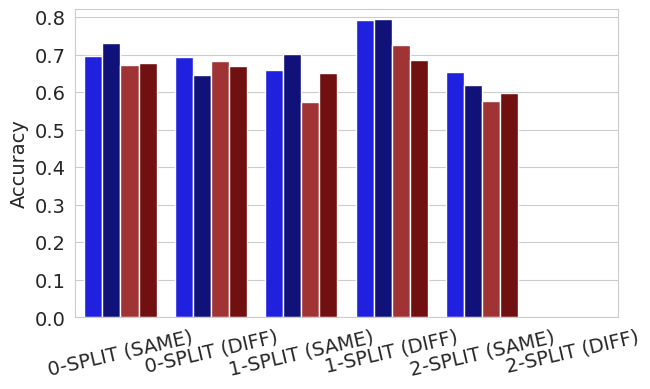

In [7]:
sns.set_style("whitegrid")
colors = []
for cname in ["blue"]: 
        cs = sorted(sns.light_palette(cname, n_colors=4))[:1]
        colors.extend(cs)
colors.append("darkblue")
colors.append("firebrick")
colors.append("maroon")

res = []
for mn, strategy in [('bert','average'), ('lemma-bert','average'),  ('characterbert','average'), ('lemma-characterbert','average')]:        
    for st in sts:
        here_results = [r for i, r in all_results[mn].iterrows() if r['strategy'] == strategy and r['split-type'] == st and r['layer'] == best_layers[(mn, strategy)][st]]
        res.extend(here_results)
        
res = pd.DataFrame(res)

plt.figure(figsize=(7,4))
        
g = sns.barplot(data=res,x="split-type",y="accuracy", hue="model+strategy", palette=colors)
g.set(xticklabels=['0-SPLIT (SAME)','0-SPLIT (DIFF)','1-SPLIT (SAME)', '1-SPLIT (DIFF)','2-SPLIT (SAME)','2-SPLIT (DIFF)'])

plt.xticks(rotation=13)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.ylabel("Accuracy",fontsize=14)
plt.xlabel("")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim((0,0.82))

plt.legend(bbox_to_anchor=(1,1), fontsize=13.5,ncol=1)


g.get_legend().remove()

for i, x in res.iterrows():
    print(x['model'], x['strategy'], x['split-type'], round(x['accuracy'], 2))



google#electra-base-discriminator average 0-split-dev-SAME 0.71
google#electra-base-discriminator average 0-split-dev-DIFF 0.77
google#electra-base-discriminator average 1-split-SAME nan
google#electra-base-discriminator average 1-split-DIFF 0.62
google#electra-base-discriminator average 2-split-SAME 0.8
google#electra-base-discriminator average 2-split-DIFF 0.64
lemma-google#electra-base-discriminator average 0-split-dev-SAME 0.71
lemma-google#electra-base-discriminator average 0-split-dev-DIFF 0.7
lemma-google#electra-base-discriminator average 1-split-SAME nan
lemma-google#electra-base-discriminator average 1-split-DIFF 0.64
lemma-google#electra-base-discriminator average 2-split-SAME 0.8
lemma-google#electra-base-discriminator average 2-split-DIFF 0.63
xlnet-base-cased average 0-split-dev-SAME 0.64
xlnet-base-cased average 0-split-dev-DIFF 0.6
xlnet-base-cased average 1-split-SAME 0.58
xlnet-base-cased average 1-split-DIFF 0.63
xlnet-base-cased average 2-split-SAME 0.68
xlnet-base-

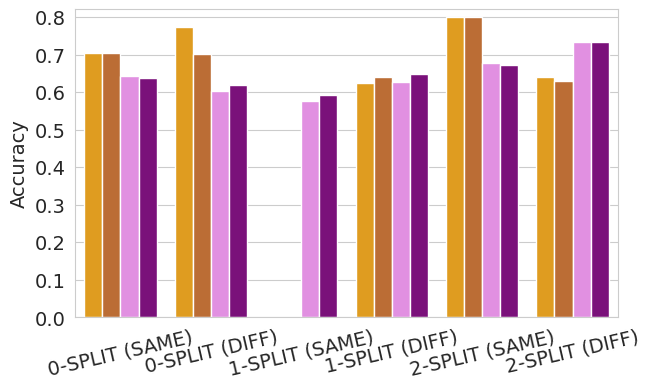

In [8]:
sns.set_style("whitegrid")

colors = []
for cname in ["orange", "violet"]: 
        if cname == "orange":
            cs = sorted(sns.light_palette(cname, n_colors=4), reverse=True)[0:1]
        elif cname == "violet":
            cs = sorted(sns.light_palette(cname, n_colors=4))[0:1]        
        colors.extend(cs)
        if cname == "orange":
            colors.append("chocolate")
        if cname == "violet":
            colors.append("darkmagenta")

            
res = []
for mn, strategy in [('google#electra-base-discriminator','average'),('lemma-google#electra-base-discriminator','average'),('xlnet-base-cased','average'),
                    ('lemma-xlnet-base-cased','average')]:        
    for st in sts:            
        here_results = [r for i, r in all_results[mn].iterrows() if r['strategy'] == strategy and r['split-type'] == st and r['layer'] == best_layers[(mn, strategy)][st]]
        res.extend(here_results)
        
res = pd.DataFrame(res)

plt.figure(figsize=(7,4))
        
g = sns.barplot(data=res,x="split-type",y="accuracy", hue="model+strategy", palette=colors)
g.set(xticklabels=['0-SPLIT (SAME)','0-SPLIT (DIFF)','1-SPLIT (SAME)','1-SPLIT (DIFF)','2-SPLIT (SAME)','2-SPLIT (DIFF)'])

plt.xticks(rotation=13)
plt.yticks([0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8])
plt.ylabel("Accuracy",fontsize=14)
plt.xlabel("")
plt.tick_params(axis='both', which='major', labelsize=14)
plt.ylim((0,0.82))

plt.legend(bbox_to_anchor=(1,1), fontsize=13.5,ncol=1)


g.get_legend().remove()

for i, x in res.iterrows():
    print(x['model'], x['strategy'], x['split-type'], round(x['accuracy'], 2))


## Figure 4: Average similarity values (BAL)

In [9]:
bal_predictions = dict()

for mn in ["bert", "characterbert", "google#electra-base-discriminator", "xlnet-base-cased"]:

    strategy = "average"
    #print(mn)
    preds = pd.read_csv(diri + "wic_" + mn + "_predictions.tsv", sep="\t", index_col=False)
    bl = best_layers[(mn, strategy)]['ALL'] 
    #print("best layer", bl)

    preds_by_form = {'all':[], 'bal':[]}
    for st in list(preds['split-type'].unique()):             
        for i,r  in preds.iterrows():        
            thisst = r['split-type']
            if st != thisst:
                continue           
            if r['split-type-complex'] == '0-split-train':
                continue            
            if r['layer'] == bl:
                cl = r['BAL']
                preds_by_form['all'].append({'split-type':thisst, 'pred':r[strategy]})
                if cl == "bal":
                    preds_by_form['bal'].append({'split-type':thisst, 'pred':r[strategy]})

    for k in preds_by_form:
        #print(k)
        df = pd.DataFrame(preds_by_form[k])        
        #for f in df['split-type'].unique():        
        #    print(f, np.average(df[df['split-type'] == f]['pred']))
    bal_predictions[mn] = preds_by_form






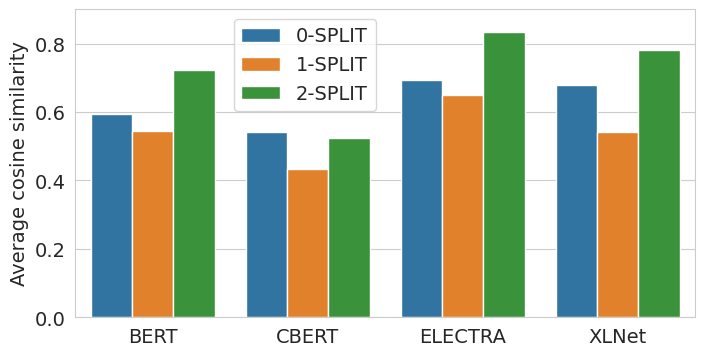

In [10]:
long_to_short_model_name = {"bert-base-uncased":"bert", "bert":"BERT", "bert-base-cased":"bert-cased", # "microsoft#deberta-v3-base":"deberta", "roberta-base":"roberta",
                     "xlnet-base-cased":"XLNet", "google#electra-base-discriminator":"ELECTRA", "characterbert":"CBERT", "bert-flota-3":"bert"} # characterbert is evaluated using the bert tokenization


results_for_similarity_plot = []

for mn in bal_predictions:
    results_for_similarity_plot.append({'model':long_to_short_model_name[mn], 'split-type':'0-SPLIT','average pred':np.average([x['pred'] for x in bal_predictions[mn]['all'] if x['split-type'] == '0-split'])})
    results_for_similarity_plot.append({'model':long_to_short_model_name[mn], 'split-type':'1-SPLIT','average pred':np.average([x['pred'] for x in bal_predictions[mn]['bal'] if x['split-type'] == '1-split'])})
    results_for_similarity_plot.append({'model':long_to_short_model_name[mn], 'split-type':'2-SPLIT','average pred':np.average([x['pred'] for x in bal_predictions[mn]['bal'] if x['split-type'] == '2-split'])})
    
results_for_similarity_plot = pd.DataFrame(results_for_similarity_plot)

plt.figure(figsize=(8,4))

ax = sns.barplot(results_for_similarity_plot, y="average pred", x="model", hue='split-type') 


plt.ylabel("Average cosine similarity", fontsize=14)
plt.ylim(0, 0.9)
sns.move_legend(ax, "best", bbox_to_anchor=(0.22, 0.5, 0.28, 0.5), fontsize=14, title="") 
plt.xlabel("")

plt.tick_params(axis='both', which='major', labelsize=14)
    
plt.show()

In [11]:
results_for_similarity_plot

,model,split-type,average pred
0,BERT,0-SPLIT,0.593676
1,BERT,1-SPLIT,0.545134
2,BERT,2-SPLIT,0.721857
3,CBERT,0-SPLIT,0.541482
4,CBERT,1-SPLIT,0.433497
5,CBERT,2-SPLIT,0.523921
6,ELECTRA,0-SPLIT,0.694218
7,ELECTRA,1-SPLIT,0.650802
8,ELECTRA,2-SPLIT,0.833778
9,XLNet,0-SPLIT,0.678706
